In [11]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.interpolate import interp1d
from scipy.optimize import root

In [12]:
common_settings = {
'omega_b':0.0223828,
'h':0.67810,
'z_reio':7.6711,
'YHe':0.25,
'perturbations_verbose':1,
'background_verbose':3,
'output':'mTk, vTk, mPk',
'gauge':'newtonian',
'P_k_max_1/Mpc':10,
'z_max_pk':1000,
'format':'class',

# 'omega_cdm':0.4363,
'omega_cdm':0.11,

}

In [13]:
chiCDM = Class()
# pass input parameters
Mnu=0.1
chiCDM.set(common_settings)
aNR=1/1890/Mnu+2.5e-3
# aNR=2.e-3
# aNR=a_star_nu-8.e-5
print(f'aNR={aNR},zNR={1/aNR -1}')
chiCDM.set({
'N_ur': 3.046,
'omega_chi':0.00107363 ,
# 'omega_cdm':0.90,
# 'f_chi':0.1,
'acs_chi':aNR,
'cs2_peak_chi':1./3.
})

nuCDM = Class()
nuCDM.set(common_settings)
nuCDM.set({
    'f_chi': 1.e-5,
# class convention for N_ur (for 0, 1, 2 or 3 massive neutrinos, 3.046, 2.0328,
# 1.0196, 0.00641 respectively)
    'N_ur': 2.0328,
    'N_ncdm':1,
    'm_ncdm':Mnu,
})


chiCDM.compute()
nuCDM.compute()

#get the growth factor of a LCDM equivalent
pureCDM = Class()
pureCDM.set(common_settings)
pureCDM.set({
    'N_ur': 3.046,
    'omega_cdm':0.11+0.00107363,
    # 'omega_cdm':0.4363+0.00107363,

    'f_chi': 1.e-8,
})
pureCDM.compute()

f_CDM=interp1d(1/(1+pureCDM.get_background()['z']),pureCDM.get_background()['gr.fac. f'])
Ha_pure=pureCDM.get_background()['H [1/Mpc]']/(1.+pureCDM.get_background()['z'])
Ha_pure_int=interp1d(1/(1.+pureCDM.get_background()['z']),Ha_pure)


aNR=0.007791005291005291,zNR=127.35314091680814
Running CLASS version v3.2.0
Computing background
Chose ndf15 as generic_evolver
 -> age = 14.024724 Gyr
 -> conformal age = 14522.420249 Mpc
 -> N_eff = 3.046 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3188.906765
    corresponding to conformal time = 120.369448 Mpc
 ---------------------------- Budget equation ----------------------- 
 ---> Nonrelativistic Species 
-> Bayrons                        Omega = 0.0486773       , omega = 0.0223828      
-> Cold Dark Matter               Omega = 0.239224        , omega = 0.11           
-> Dark Matter with sound speed:  Omega = 0.00233489      , omega = 0.00107363     
 ---> Relativistic Species 
-> Photons                        Omega = 5.37815e-05     , omega = 2.47298e-05    
-> Ultra-relativistic relics      Omega = 3.72044e-05     , omega = 1.71073e-05    
 ---> Other Content 
-> Cosmological Constant          Omega = 0.709673 

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_ncdm[0]', '(.)p_ncdm[0]', '(.)rho_chi', '(.)kJ_chi', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])


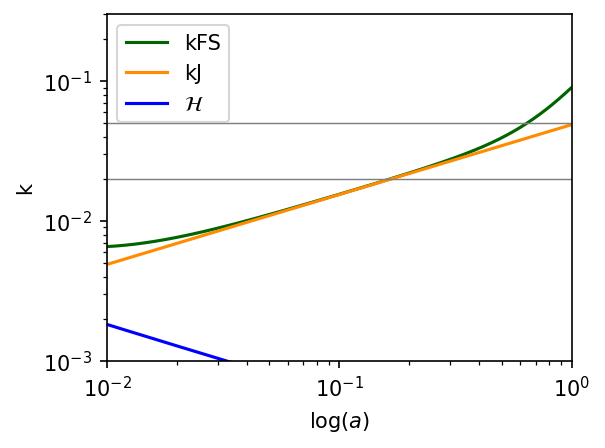

In [14]:
plt.figure(figsize=(4,3), dpi=150)

background = chiCDM.get_background() # load background table
a = 1/(background['z']+1) # read redshift
rho_cdm=background['(.)rho_cdm']
rho_chi=background['(.)rho_chi']
kJ_chi=background['(.)kJ_chi']

Ha=background['H [1/Mpc]']/(1.+background['z'])
Ha_chi_int=interp1d(a,Ha)

background = nuCDM.get_background() # load background table
background_a = 1/(background['z']+1) # read redshift
rho_nu=background['(.)rho_ncdm[0]']


plt.xlabel(r'$a $')
# plt.loglog(background_a,rho_cdm,label=r'CDM')
# plt.loglog(background_a,rho_chi,label=r'$\chi$')
# plt.loglog(background_a,rho_nu,label=r'rho_nu')

# compute kFS for neutrinos
h = chiCDM.h() # get reduced Hubble for conversions to 1/Mpc
background = nuCDM.get_background() # load background table
rho_nu=background['(.)rho_ncdm[0]']
p_nu=background['(.)p_ncdm[0]']
drho_nu_da = np.gradient(rho_nu, a)
dp_nu_da = np.gradient(p_nu, a)
cFS2_nu=dp_nu_da/drho_nu_da
Ha=background['H [1/Mpc]']/(1.+background['z'])
Ha_nu_int=interp1d(a,Ha)

print(background.keys())
k_FS_nu=np.sqrt(3/2)*Ha/h/(np.sqrt(cFS2_nu))

# plt.loglog(background_a,cFS2_nu,label=r'cFS')
plt.loglog(a,k_FS_nu,'darkgreen',label=r'kFS')
plt.loglog(a,kJ_chi,'darkorange',label=r'kJ')

plt.loglog(a,Ha/h,'blue',label=r'$\mathcal{H}$')

plt.axhline(y=0.02, color='gray', linewidth=0.7)
plt.axhline(y=0.05, color='gray', linewidth=0.7)

plt.xlim([1.e-2,1])
plt.ylim([1.e-3,3.e-1])

plt.legend(loc='best')
plt.xscale('log')
plt.xlabel(r'$\log(a)$')
plt.ylabel(r'k')
plt.show()


dict_keys(['k (h/Mpc)', 'd_g', 'd_b', 'd_cdm', 'd_ur', 'd_chi', 'd_m', 'd_tot', 'phi', 'psi', 't_g', 't_b', 't_cdm', 't_ur', 't_chi', 't_tot'])
Evaluating at k=0.175916


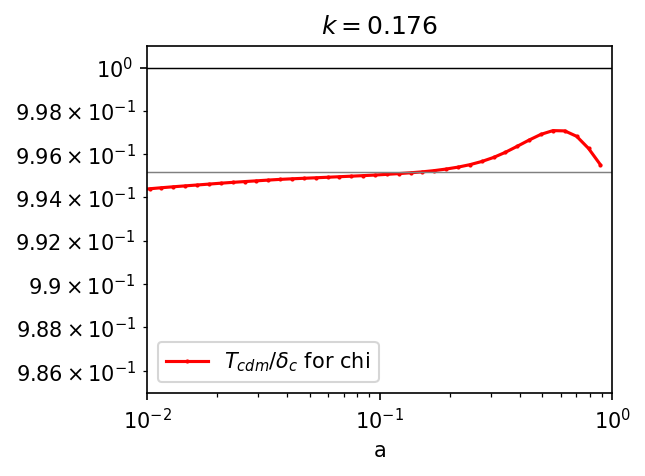

In [15]:
a_eval=np.logspace(-2.5,0,50)
pure_tk_z=[]
chi_tk_z=[]
nu_tk_z=[]
for a in a_eval:
    pure_tk_z.append(pureCDM.get_transfer(z=1/a-1))
    chi_tk_z.append(chiCDM.get_transfer(z=1/a-1))
    nu_tk_z.append(nuCDM.get_transfer(z=1/a-1))
chi_tk_z=np.array(chi_tk_z)
nu_tk_z=np.array(nu_tk_z)


print(chi_tk_z[1].keys())
kidx=70
kEval=chi_tk_z[1]['k (h/Mpc)'][kidx]
print('Evaluating at k={:.6f}'.format(kEval))# print(tk['d_chi'].shape)
pure_cdm_z=-np.array([d['d_cdm'][kidx] for d in pure_tk_z])
growth_rate=np.gradient(np.log(pure_cdm_z), np.log(a_eval))


d_chi_z=-np.array([d['d_chi'][kidx] for d in chi_tk_z])
d_cdm_chi_z=-np.array([d['d_cdm'][kidx] for d in chi_tk_z])
d_nu_z=-np.array([d['d_ncdm[0]'][kidx] for d in nu_tk_z])
d_cdm_nu_z=-np.array([d['d_cdm'][kidx] for d in nu_tk_z])

t_cdm_chi_z=-np.array([d['t_cdm'][kidx] for d in chi_tk_z])
t_cdm_nu_z=-np.array([d['t_cdm'][kidx] for d in nu_tk_z])

g_chi=-t_cdm_chi_z/Ha_chi_int(a_eval)/growth_rate/d_cdm_chi_z

growth_rate_chi=np.gradient(np.log(d_cdm_chi_z), np.log(a_eval))
growth_rate_nu=np.gradient(np.log(d_cdm_nu_z), np.log(a_eval))


plt.figure(figsize=(4,3), dpi=150)
plt.loglog(a_eval[:-1],g_chi[:-1],'r-o',label=r'$T_{cdm} / \delta_c$ for chi', markersize=1.)

# plt.loglog(a_eval,growth_rate_chi/growth_rate,'r-o',label=r'$T_{cdm} / \delta_c$ for chi', markersize=1.)
# plt.loglog(a_eval,growth_rate_nu/growth_rate,'g-o',label=r'$T_{cdm} / \delta_c$ for nu', markersize=1.)
# plt.loglog(a_eval,growth_rate/growth_rate,'k-o',label=r'$T_{cdm} / \delta_c$ for cdm', markersize=1.)
plt.axhline(y=1-3/5*0.00107363/0.133456, color='gray', linewidth=0.7)
plt.axhline(y=1, color='k', linewidth=0.7)

# plt.plot(a_eval,chi_ratio,'r-o',label=r'$\delta_\chi / \delta_c$', markersize=2.)
# plt.plot(a_eval,nu_ratio,'g-o',label=r'$\delta_\nu / \delta_c$', markersize=2.)
plt.legend(loc='best')
plt.title(r'$k='+'{:.3f}'.format(kEval)+r'$')
plt.xlim([1.e-2,1])
plt.ylim([0.985,1.001])

plt.xscale('log')
plt.xlabel('a')
plt.show()

In [16]:
Ha_chi_int(a_eval)[-3]
# g_chi[-2]

0.0002036772868931051

----
### Now just plot T_c withour comparing to Mnu: chose fchi big to see the effects

In [17]:
chiCDM = Class()
# pass input parameters
Mnu=0.1
chiCDM.set(common_settings)
# aNR=1/1890/Mnu+2.5e-3
aNR=1.e-3
f_chi=0.1
print(f'aNR={aNR},zNR={1/aNR -1}')
chiCDM.set({
'N_ur': 3.046,
'omega_cdm':0.4363,
'omega_chi':0.4363*f_chi,
'acs_chi':aNR,
'cs2_peak_chi':1./3.,
# 'T_cmb':1.8,
})
chiCDM.compute()

#get the growth factor of a LCDM equivalent
pureCDM = Class()
pureCDM.set(common_settings)
pureCDM.set({
    'N_ur': 3.046,
    'omega_cdm':0.4363*(1+f_chi),
    'T_cmb':1.8,
    # 'omega_cdm':0.4363+0.00107363,
    # 'f_chi': 1.e-8,
})
pureCDM.compute()

f_CDM=interp1d(1/(1+pureCDM.get_background()['z']),pureCDM.get_background()['gr.fac. f'])
Ha_pure=pureCDM.get_background()['H [1/Mpc]']/(1.+pureCDM.get_background()['z'])
Ha_pure_int=interp1d(1/(1.+pureCDM.get_background()['z']),Ha_pure)

aNR=0.001,zNR=999.0
Running CLASS version v3.2.0
Computing background
Chose ndf15 as generic_evolver
 -> age = 9.331324 Gyr
 -> conformal age = 8436.012105 Mpc
 -> N_eff = 3.046 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 12005.397885
    corresponding to conformal time = 31.980226 Mpc
 ---------------------------- Budget equation ----------------------- 
 ---> Nonrelativistic Species 
-> Bayrons                        Omega = 0.0486773       , omega = 0.0223828      
-> Cold Dark Matter               Omega = 0.94885         , omega = 0.4363         
-> Dark Matter with sound speed:  Omega = 0.094885        , omega = 0.04363        
 ---> Relativistic Species 
-> Photons                        Omega = 5.37815e-05     , omega = 2.47298e-05    
-> Ultra-relativistic relics      Omega = 3.72044e-05     , omega = 1.71073e-05    
 ---> Other Content 
-> Cosmological Constant          Omega = -0.0925037      , omega = -0.042535    

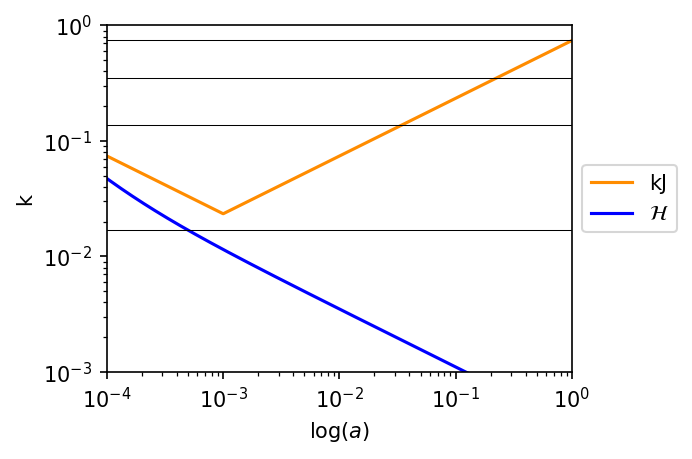

In [18]:
plt.figure(figsize=(4,3), dpi=150)

background = chiCDM.get_background() # load background table
a = 1/(background['z']+1) # read redshift
rho_cdm=background['(.)rho_cdm']
rho_chi=background['(.)rho_chi']
kJ_chi=background['(.)kJ_chi']

Ha=background['H [1/Mpc]']/(1.+background['z'])
Ha_chi_int=interp1d(a,Ha)
kJ_int=interp1d(a,kJ_chi)

plt.xlabel(r'$a $')

h = chiCDM.h() # get reduced Hubble for conversions to 1/Mpc

# plt.loglog(background_a,cFS2_nu,label=r'cFS')
plt.loglog(a,kJ_chi,'darkorange',label=r'kJ')

plt.loglog(a,Ha/h,'blue',label=r'$\mathcal{H}$')

plt.axhline(y=0.017, color='k', linewidth=0.5)
plt.axhline(y=0.138, color='k', linewidth=0.5)
plt.axhline(y=0.350, color='k', linewidth=0.5)
plt.axhline(y=0.748, color='k', linewidth=0.5)


plt.xlim([1.e-4,1])
plt.ylim([1.e-3,1])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xscale('log')
plt.xlabel(r'$\log(a)$')
plt.ylabel(r'k')
plt.savefig('/home/fverdian/class/soundspeed-scripts/figure/s_growth.pdf',bbox_inches='tight')

plt.show()


In [19]:
a_eval=np.logspace(-2.5,0,100)
pure_tk_z=[]
chi_tk_z=[]
for a in a_eval:
    pure_tk_z.append(pureCDM.get_transfer(z=1/a-1))
    chi_tk_z.append(chiCDM.get_transfer(z=1/a-1))
chi_tk_z=np.array(chi_tk_z)

kidx=100
kEval=chi_tk_z[1]['k (h/Mpc)'][kidx]
print('Evaluating at k={:.6f}'.format(kEval))# print(tk['d_chi'].shape)
d_cdm_pure_z=-np.array([d['d_cdm'][kidx] for d in pure_tk_z])
growth_rate=np.gradient(np.log(d_cdm_pure_z), np.log(a_eval))

d_chi_z=-np.array([d['d_chi'][kidx] for d in chi_tk_z])
d_cdm_chi_z=-np.array([d['d_cdm'][kidx] for d in chi_tk_z])
t_cdm_chi_z=-np.array([d['t_cdm'][kidx] for d in chi_tk_z])

t_cdm_pure_z=-np.array([d['t_cdm'][kidx] for d in pure_tk_z])

growth_rate_chi=np.gradient(np.log(d_cdm_chi_z), np.log(d_cdm_pure_z))

g_chi=-t_cdm_chi_z/Ha_pure_int(a_eval)/growth_rate/d_cdm_chi_z

g_cdm=-t_cdm_pure_z/Ha_pure_int(a_eval)/growth_rate/d_cdm_pure_z

Evaluating at k=0.748112


eta star = -6.907755278982137
logratio = 6.925793120414897


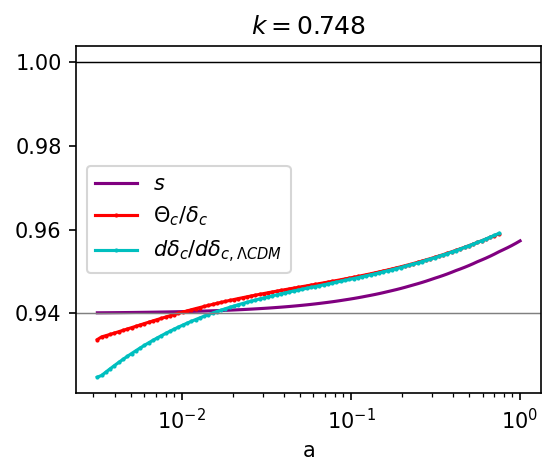

In [25]:
from scipy.integrate import odeint

## START WITH g AND h 
def gh_system(w, t):
    g,h = w
    dgdt = h - g
    dhdt = 3/2 *(1-h)-3/2*np.exp(-t)*g
    return [dgdt, dhdt]
# Initial conditions
w0 = [0.,0.]
t = np.linspace(-10,30, 100)

# Solve the differential equation
sol = odeint(gh_system, w0, t)
g_int = interp1d(t, sol[:, 0])
h_int = interp1d(t, sol[:, 1])

def s1_system(s1, t):
    ds1dt = -2.5*s1+1.5*(g_int(t)-1)
    return ds1dt
t = np.linspace(-10,20, 100)
sol = odeint(s1_system, -3/5., t)

# Plot the solution
eta_star=np.log(aNR)
print(f'eta star = {eta_star}')
print(f'logratio = {2*np.log(kEval/kJ_int(aNR))}')

#t is tilde eta, ci ho perso una giornata eh
eta=t+eta_star+2*np.log(kEval/kJ_int(aNR))
s1_int = interp1d(np.exp(eta), sol[:, 0])

fx=f_chi/(1+f_chi)
plt.figure(figsize=(4,3), dpi=150)
D_cdm=d_cdm_pure_z/d_cdm_pure_z[-1]
plt.plot(a_eval,1+f_chi*s1_int(D_cdm),'purple',label=r'$s$')

plt.plot(a_eval[:-5],g_chi[:-5],'r-o',label=r'$\Theta_{c} / \delta_c$', markersize=1.)
# plt.plot(a_eval[:-5],growth_rate[:-5],'b-o',label=r'$T_{cdm} / \delta_c$ for chi', markersize=1.)
plt.plot(a_eval[:-5],growth_rate_chi[:-5],'c-o',label=r'$d\delta_c  / d\delta_{c,\Lambda CDM}$', markersize=1.)
# plt.plot(a_eval,f_CDM(a_eval),'b-o',label=r'$T_{cdm} / \delta_c$ for chi', markersize=1.)
plt.title(r'$k='+'{:.3f}'.format(kEval)+r'$')
plt.axhline(y=1-3/5*f_chi, color='gray', linewidth=0.7)
plt.axhline(y=1, color='k', linewidth=0.7)
plt.xscale('log')
plt.xlabel('a')
plt.legend()
plt.savefig('/home/fverdian/class/soundspeed-scripts/figure/s_growth.pdf')
plt.show()